<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Aula8_Adaptada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estruturas de Dados

## GeoSeries vs GeoDataframe

A `GeoSeries` é um vetor onde cada entrada no vetor é um conjunto de formas correspondentes a uma observação, por exemplo, um único polígono.

Já o `GeoDataframe` é uma estrutura de dados que contém um arquivo `GeoSeries`.

In [ ]:
!pip install click==8.1.3
!pip install geopandas
import geopandas as gpd

In [ ]:
from shapely.geometry import Polygon, LineString, Point

s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1,1), (0,1)]),
        Polygon([(10, 0), (10,5), (0,0)]),
        Polygon([(0, 0), (2,2), (2,0)]),
        LineString([(0, 0), (1,1), (0,1)]),
        Point(0,1)
    ]

)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    POLYGON ((10.00000 0.00000, 10.00000 5.00000, ...
2    POLYGON ((0.00000 0.00000, 2.00000 2.00000, 2....
3    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
4                              POINT (0.00000 1.00000)
dtype: geometry

In [ ]:
type(s)

geopandas.geoseries.GeoSeries

## Diferença entre Dataframe e GeoDataframe



In [ ]:
import geopandas as gpd
import os
#from osgeo import gdal
#gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
#in_vector = '/content/sample_data/BR_Municipios_2021.shp'
#gdf = gpd.read_file(in_vector)

In [ ]:
# Definir o caminho da pasta
#pasta = r'C:\AmbientalPro\Extras\BR_Municipios_2021\BR_Municipios_2021.shp'
pasta = "/content/sample_data/BR_Municipios_2021.shp"

# Juntar o nome do arquivo com a pasta
#pasta_arquivo = os.path.join(pasta, 'BR_Municipios_2021.shp')
print(pasta)
#print(pasta_arquivo)

/content/sample_data/BR_Municipios_2021.shp


In [ ]:
dados = gpd.read_file(pasta)

In [ ]:
type(dados)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dados.head(10)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
5,1100064,Colorado do Oeste,RO,1451.060,"POLYGON ((-60.50475 -12.96672, -60.50475 -12.9..."
6,1100072,Corumbiara,RO,3060.321,"POLYGON ((-61.34273 -12.66662, -61.34468 -12.6..."
7,1100080,Costa Marques,RO,4987.177,"POLYGON ((-63.71199 -11.65013, -63.70613 -11.6..."
8,1100098,Espigão D'Oeste,RO,4518.038,"POLYGON ((-60.94827 -10.98856, -60.94769 -10.9..."
9,1100106,Guajará-Mirim,RO,24856.877,"POLYGON ((-65.37759 -10.43110, -65.37683 -10.4..."


In [ ]:
dados.tail()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
5567,5222005,Vianópolis,GO,954.115,None
5568,5222054,Vicentinópolis,GO,733.794,None
5569,5222203,Vila Boa,GO,1052.593,None
5570,5222302,Vila Propício,GO,2181.593,None
5571,5300108,Brasília,DF,5760.784,None


In [ ]:
# Verificar o nome das colunas
dados.columns.values

array(['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry'], dtype=object)

In [ ]:
dados = dados[['NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry']]
dados.head()

,NM_MUN,SIGLA,AREA_KM2,geometry
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [ ]:
dados.shape

(5572, 4)

In [ ]:
# Verificando o número de linhas e colunas
print(f'O número de linhas é: {dados.shape[0]}')
print(f'O número de colunas é: {dados.shape[1]}')

O número de linhas é: 5572
O número de colunas é: 4


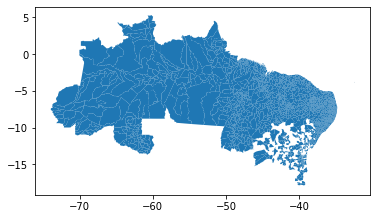

In [ ]:
dados.plot()

In [ ]:
for indice, linha in dados[0:10].iterrows():
    area_polig = linha['geometry'].area
    print(f"O polígono de índice {indice} possui uma área de {area_polig:.2f} m²")
    

O polígono de índice 0 possui uma área de 0.59 m²
O polígono de índice 1 possui uma área de 0.36 m²
O polígono de índice 2 possui uma área de 0.11 m²
O polígono de índice 3 possui uma área de 0.31 m²
O polígono de índice 4 possui uma área de 0.23 m²
O polígono de índice 5 possui uma área de 0.12 m²
O polígono de índice 6 possui uma área de 0.25 m²
O polígono de índice 7 possui uma área de 0.41 m²
O polígono de índice 8 possui uma área de 0.37 m²
O polígono de índice 9 possui uma área de 2.06 m²


In [ ]:
# Criar uma coluna área 
dados['Area'] = dados.area
dados.head()

<ipython-input-14-93ed8c99164c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dados['Area'] = dados.area


,NM_MUN,SIGLA,AREA_KM2,geometry,Area
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",0.587657
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",0.364965
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",0.109724
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",0.314085
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",0.232089


In [ ]:
dados = dados.drop(columns=['Area'])
dados.head()

,NM_MUN,SIGLA,AREA_KM2,geometry
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [ ]:
dados['AREA_HA'] = dados['AREA_KM2'] * 100
dados.head()

,NM_MUN,SIGLA,AREA_KM2,geometry,AREA_HA
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",706712.7
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",442657.1
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",131435.2
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",379300.0
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",278330.0


In [ ]:
# área máxima em km2
round(dados['AREA_KM2'].max(), 2)

159533.31

In [ ]:
dados['AREA_KM2'].min()

3.565

In [ ]:
dados['AREA_KM2'].mean()

1527.3412670495336

In [ ]:
dados['AREA_KM2'].sum() / dados['AREA_KM2'].shape[0]

1527.3412670495336

# Selecionando um Estado e Salvando

In [ ]:
select = dados.loc[dados['SIGLA'] == 'RR']

In [ ]:
select.head()

,NM_MUN,SIGLA,AREA_KM2,geometry,AREA_HA
4311,Abdon Batista,SC,237.517,None,23751.7
4312,Abelardo Luz,SC,953.992,None,95399.2
4313,Agrolândia,SC,206.815,None,20681.5
4314,Agronômica,SC,129.774,None,12977.4
4315,Água Doce,SC,1319.137,None,131913.7


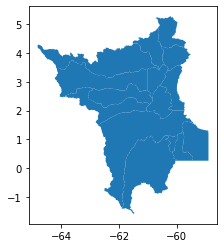

In [ ]:
select.plot()

In [ ]:
pasta_saida = r"/content/sample_data/RR_Municipios_2021"

# Criar pasta
os.mkdir(pasta_saida)

In [ ]:
arquivo_saida = os.path.join(pasta_saida, "RR_Municipios_2021.shp")
print(arquivo_saida)

/content/sample_data/RR_Municipios_2021/RR_Municipios_2021.shp


In [ ]:
# Salvando o arquivo
select.to_file(arquivo_saida)

# Agrupando GeoDataframe

In [ ]:
dados.head()

,NM_MUN,SIGLA,AREA_KM2,geometry,AREA_HA
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",706712.7
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",442657.1
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",131435.2
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",379300.0
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",278330.0


In [ ]:
dados['SIGLA'].unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [ ]:
agrupar = dados.groupby('SIGLA')
agrupar

In [ ]:
agrupar.groups.keys()

dict_keys(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'])

In [ ]:
for chave, grupo in agrupar:
    print(f'Sigla: {chave}')
    print(f'Número de Municípios: {len(grupo)}')

Sigla: AC
Número de Municípios: 22
Sigla: AL
Número de Municípios: 102
Sigla: AM
Número de Municípios: 62
Sigla: AP
Número de Municípios: 16
Sigla: BA
Número de Municípios: 417
Sigla: CE
Número de Municípios: 184
Sigla: DF
Número de Municípios: 1
Sigla: ES
Número de Municípios: 78
Sigla: GO
Número de Municípios: 246
Sigla: MA
Número de Municípios: 217
Sigla: MG
Número de Municípios: 853
Sigla: MS
Número de Municípios: 79
Sigla: MT
Número de Municípios: 141
Sigla: PA
Número de Municípios: 144
Sigla: PB
Número de Municípios: 223
Sigla: PE
Número de Municípios: 185
Sigla: PI
Número de Municípios: 224
Sigla: PR
Número de Municípios: 399
Sigla: RJ
Número de Municípios: 92
Sigla: RN
Número de Municípios: 167
Sigla: RO
Número de Municípios: 52
Sigla: RR
Número de Municípios: 15
Sigla: RS
Número de Municípios: 499
Sigla: SC
Número de Municípios: 295
Sigla: SE
Número de Municípios: 75
Sigla: SP
Número de Municípios: 645
Sigla: TO
Número de Municípios: 139


In [ ]:
arquivo_saida = r"/content/sample_data/BR_Mucipios_2021"

resultado = os.path.join(arquivo_saida, "Resultados")

if not os.path.exists(resultado):
    print("Criando a pasta.")
    os.makedirs(resultado)
else:
    print("A pasta ja existe")

A pasta ja existe


In [ ]:
agrupar.head()

,NM_MUN,SIGLA,AREA_KM2,geometry,AREA_HA
0,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",706712.7
1,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",442657.1
2,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",131435.2
3,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",379300.0
4,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",278330.0
...,...,...,...,...,...
5326,Abadiânia,GO,1044.555,None,104455.5
5327,Acreúna,GO,1566.742,None,156674.2
5328,Adelândia,GO,115.385,None,11538.5
5329,Água Fria de Goiás,GO,2023.636,None,202363.6


In [ ]:
for chave, grupo in agrupar:
    nome_saida = f'SIGLA_{chave}.shp'
    print('Salvando o arquivo', os.path.basename(nome_saida))
    caminho_saida = os.path.join(resultado, nome_saida)
    grupo.to_file(caminho_saida)

Salvando o arquivo SIGLA_AC.shp
Salvando o arquivo SIGLA_AL.shp
Salvando o arquivo SIGLA_AM.shp
Salvando o arquivo SIGLA_AP.shp
Salvando o arquivo SIGLA_BA.shp
Salvando o arquivo SIGLA_CE.shp
Salvando o arquivo SIGLA_DF.shp
Salvando o arquivo SIGLA_ES.shp
Salvando o arquivo SIGLA_GO.shp
Salvando o arquivo SIGLA_MA.shp
Salvando o arquivo SIGLA_MG.shp
Salvando o arquivo SIGLA_MS.shp
Salvando o arquivo SIGLA_MT.shp
Salvando o arquivo SIGLA_PA.shp
Salvando o arquivo SIGLA_PB.shp
Salvando o arquivo SIGLA_PE.shp
Salvando o arquivo SIGLA_PI.shp
Salvando o arquivo SIGLA_PR.shp
Salvando o arquivo SIGLA_RJ.shp
Salvando o arquivo SIGLA_RN.shp
Salvando o arquivo SIGLA_RO.shp
Salvando o arquivo SIGLA_RR.shp
Salvando o arquivo SIGLA_RS.shp
Salvando o arquivo SIGLA_SC.shp
Salvando o arquivo SIGLA_SE.shp
Salvando o arquivo SIGLA_SP.shp
Salvando o arquivo SIGLA_TO.shp


# Trabalhando com Coordenadas

Para saber o código do EPSG da região de interesse existem diversos sites, mas eu costumo utilizar esse aqui: 
https://spatialreference.org/

In [ ]:
import geopandas as gpd

In [ ]:
arquivo = r"/content/sample_data/BR_Mucipios_2021/Resultados/SIGLA_RR.shp"

In [ ]:
dados_rr = gpd.read_file(arquivo)
dados_rr.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-61.33730 4.31159, -61.33656 4.31136..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-63.61441 3.73768, -63.61052 3.73712..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-60.47539 3.60573, -60.47501 3.60507..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-59.88384 3.56296, -59.88244 3.56296..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-60.56198 2.87580, -60.56090 2.87470..."


In [ ]:
# Verificar o sistema de coordenadas
dados_rr.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Criar uma cópia do arquivo
dados_rr_epsg_4674 = dados_rr.copy()

# Reprojetar para a coordenada da região
dados_rr = dados_rr.to_crs(epsg=31982)

In [ ]:
dados_rr.crs

<Derived Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
dados_rr.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-653293.122 10484456.542, -653210.82..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-912135.945 10423391.884, -911694.57..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-557124.128 10404082.309, -557082.01..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-490624.014 10398620.932, -490467.19..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-567654.024 10322366.237, -567532.70..."


In [ ]:
dados_sc['AREA_M2'] = dados_rr.area
dados_rr.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-653293.122 10484456.542, -653210.82..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-912135.945 10423391.884, -911694.57..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-557124.128 10404082.309, -557082.01..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-490624.014 10398620.932, -490467.19..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-567654.024 10322366.237, -567532.70..."


In [ ]:
dados_rr_epsg_4674.head()

,NM_MUN,SIGLA,AREA_KM2,AREA_HA,geometry
0,Amajari,RR,28473.450,2847345.0,"POLYGON ((-61.33730 4.31159, -61.33656 4.31136..."
1,Alto Alegre,RR,25454.297,2545429.7,"POLYGON ((-63.61441 3.73768, -63.61052 3.73712..."
2,Boa Vista,RR,5687.037,568703.7,"POLYGON ((-60.47539 3.60573, -60.47501 3.60507..."
3,Bonfim,RR,8079.914,807991.4,"POLYGON ((-59.88384 3.56296, -59.88244 3.56296..."
4,Cantá,RR,7664.831,766483.1,"POLYGON ((-60.56198 2.87580, -60.56090 2.87470..."


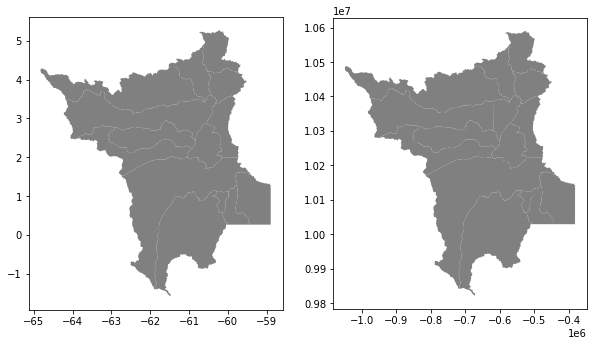

In [ ]:
import matplotlib.pyplot as plt

# Fazendo um plot do lado do outro

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

dados_rr_epsg_4674.plot(ax=ax1, facecolor='gray')
dados_rr.plot(ax=ax2, facecolor='gray')

# Definir a proporção como 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)


In [ ]:
# Salvar o arquivo

arquivo_saida = r"/content/sample_data/RR_Municipios_2021/RR_Municipios_2021_EPSG_31982.shp"

dados_rr.to_file(arquivo_saida)